In [1]:
pip install gensim matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 84.2 MB/s eta 0:00:00


In [2]:
from gensim.models import KeyedVectors
import gensim.downloader as api

def load_word2vec(path="GoogleNews-vectors-negative300.bin"):
    try:
        print("Trying to load GoogleNews pretrained Word2Vec...")
        model = KeyedVectors.load_word2vec_format(path, binary=True)
        print("Loaded GoogleNews model successfully!")
        return model
    except Exception as e:
        print("GoogleNews model not found or failed to load.")
        print("Falling back to a smaller pretrained model: 'word2vec-google-news-300' from Gensim API")
        model = api.load("word2vec-google-news-300")
        print("Loaded fallback model successfully!")
        return model

model = load_word2vec()


Trying to load GoogleNews pretrained Word2Vec...
GoogleNews model not found or failed to load.
Falling back to a smaller pretrained model: 'word2vec-google-news-300' from Gensim API
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Loaded fallback model successfully!


In [3]:
def print_similar_words(word):
    try:
        print(f"\n🔍 Most similar to '{word}':")
        for w, score in model.most_similar(word):
            print(f"  {w:15}  score={score:.4f}")
    except KeyError:
        print(f"⚠️ Word '{word}' not found in vocabulary.")

print_similar_words("king")
print_similar_words("queen")
print_similar_words("india")



🔍 Most similar to 'king':
  kings            score=0.7138
  queen            score=0.6511
  monarch          score=0.6413
  crown_prince     score=0.6204
  prince           score=0.6160
  sultan           score=0.5865
  ruler            score=0.5798
  princes          score=0.5647
  Prince_Paras     score=0.5433
  throne           score=0.5422

🔍 Most similar to 'queen':
  queens           score=0.7399
  princess         score=0.7071
  king             score=0.6511
  monarch          score=0.6384
  very_pampered_McElhatton  score=0.6357
  Queen            score=0.6163
  NYC_anglophiles_aflutter  score=0.6061
  Queen_Consort    score=0.5924
  princesses       score=0.5908
  royal            score=0.5637

🔍 Most similar to 'india':
  indian           score=0.6967
  usa              score=0.6836
  pakistan         score=0.6815
  chennai          score=0.6676
  america          score=0.6589
  sri_lanka        score=0.6498
  canada           score=0.6491
  australia        score=0.6369
  m

In [5]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def visualize_words(words):
    valid_words = [w for w in words if w in model.key_to_index]

    if not valid_words:
        print("No valid words found in the vocabulary.")
        return

    print("Embedding & reducing dimensionality using t-SNE...")

    # Convert list → numpy array (the key fix!)
    vectors = np.array([model[w] for w in valid_words])

    tsne = TSNE(
        n_components=2,
        perplexity=min(10, len(valid_words)-1),
        learning_rate="auto",
        init="random",
        random_state=42
    )

    reduced = tsne.fit_transform(vectors)

    plt.figure(figsize=(8, 6))
    plt.title("t-SNE Visualization of Word Embeddings")

    for i, word in enumerate(valid_words):
        x, y = reduced[i, 0], reduced[i, 1]
        plt.scatter(x, y)
        plt.annotate(word, (x + 0.02, y + 0.02))

    plt.show()


Embedding & reducing dimensionality using t-SNE...


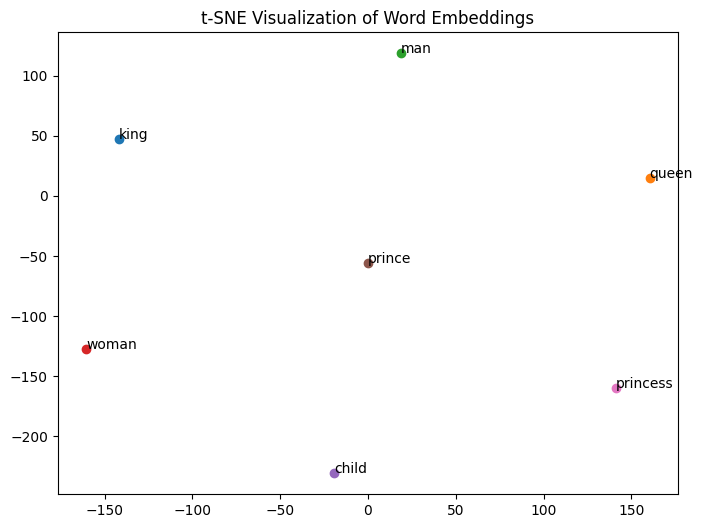

In [6]:
words_to_plot = ['king', 'queen', 'man', 'woman', 'child', 'prince', 'princess']
visualize_words(words_to_plot)
